# Exoplanet Emission Spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
import pandas as pd
# these are just for our handmade plot styling
from matplotlib_stylesheet import group05_style_sheet, style_rest, set_size
plt.rcParams.update(group05_style_sheet)
colors = [prop['color'] for prop in plt.rcParams['axes.prop_cycle']]

In [2]:
# Question 4

def scale_height(T, R, M, mu):
    m_H = 1.66054e-27 * u.kg
    g = const.G * M / R**2
    H = const.k_B * T / (g * mu * m_H)
    return H

mu_earth = 28.9647
mu_jup = 2.22
T_jup = 165 * u.K
T_juphot = 1800 * u.K
T_earth = 290 * u.K

print(f"H_earth {scale_height(T_earth, const.R_earth, const.M_earth,
                               mu_earth)}")
print("-----------------------------")
print(f"H_jup {scale_height(T_jup, const.R_jup, const.M_jup, mu_jup)}")
print("-----------------------------")
print(f"H_Hot_Jup {scale_height(T_juphot, const.R_jup, const.M_jup, mu_jup)}")

H_earth 8495.86929461577 s2 J / (kg m)
-----------------------------
H_jup 24931.554817901913 s2 J / (kg m)
-----------------------------
H_Hot_Jup 271980.5980134754 s2 J / (kg m)


In [3]:
# defining the formulas for calculating the contrast of planet and star 

def blackbody(wave, T):
    return (2 * const.h * (const.c)**2 / (wave * u.m)**5 * 1 / (np.exp(const.h *
     const.c / (wave * u.m * const.k_B * T * u.K)) - 1))

In [4]:
def opacity(sigma, mu):
    mH = 1.66054e-27
    return sigma / (mu * mH)

Brauche doch wieder unlimited daten
I mean können wir auch ja
ja lass vllt erstmal machen der scheiß hier regt mich auf

In [5]:
def contrast(wave, R_planet, R_star, a, T_star, T_surf, T_atm, sigma, mu, P, A,
              g):
    kappa = opacity(sigma, mu)
    tau = kappa * P*u.Pa / (g * u.m/(u.s)**2)
    Tau = tau.value
    func =( (R_planet * const.R_jup / (R_star * const.R_sun))**2 * 
           (blackbody(wave, T_surf) * np.exp(-Tau) + 
            (1 - np.exp(-Tau)) *
            blackbody(wave, T_atm)) / blackbody(wave, T_star) + 
            (R_planet * const.R_jup / (a * u.AU))**2 * A)
    return func

/home/valentin/.local/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/valentin/.local/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


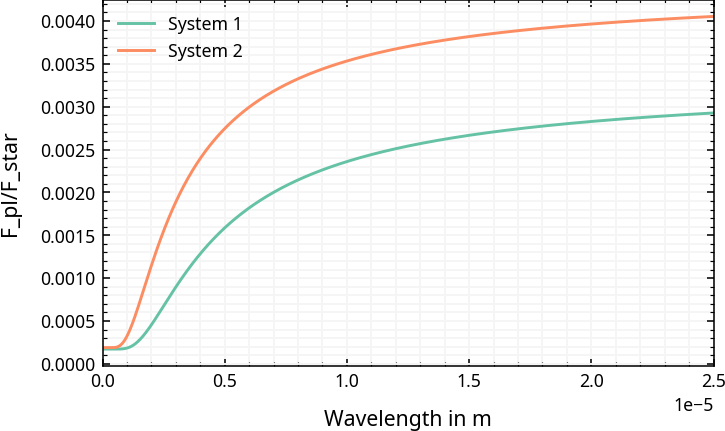

In [6]:
# Emission 1 contrast if there is no Atmosphere so first defining the constants 

wave = np.linspace(0, 2.5e5, num = 1000) * 1e-10

System1 = (1, 1, 0.01992, 5000, 1500, 0, 1, 1, 0, 0.3, 9.8)
System2 = (1, 1, 0.019, 5000, 2000, 0, 1, 1, 0, 0.3, 9.8)

fig, ax = plt.subplots()

ax.plot(wave, contrast(wave, *System1), label="System 1")
ax.plot(wave, contrast(wave, *System2), label = "System 2")
ax.set_xlabel("Wavelength in m")
ax.set_ylabel("F_pl/F_star")
ax.legend()
ax.set_xlim(0,2.5e-5)

plt.savefig("Systems.svg")
plt.show()

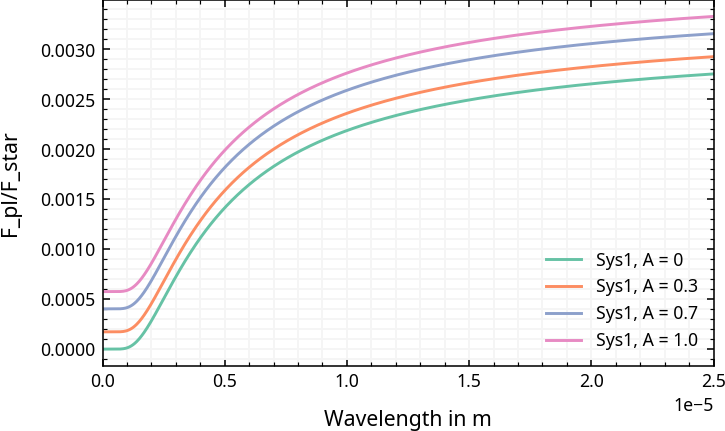

In [7]:
# Emission 2 System 1 with different Albedos 

wave = np.linspace(0, 2.5e5, num = 1000) * 1e-10

Sys1_Albedo1 = (1, 1, 0.01992, 5000, 1500, 0, 0, 1, 0, 0, 9.8)
Sys1_Albedo2 = (1, 1, 0.01992, 5000, 1500, 0, 0, 1, 0, 0.3, 9.8)
Sys1_Albedo3 = (1, 1, 0.01992, 5000, 1500, 0, 0, 1, 0, 0.7, 9.8)
Sys1_Albedo4 = (1, 1, 0.01992, 5000, 1500, 0, 0, 1, 0, 1, 9.8)


fig, ax = plt.subplots()

ax.plot(wave, contrast(wave, *Sys1_Albedo1), label="Sys1, A = 0")
ax.plot(wave, contrast(wave, *Sys1_Albedo2), label="Sys1, A = 0.3")
ax.plot(wave, contrast(wave, *Sys1_Albedo3), label="Sys1, A = 0.7")
ax.plot(wave, contrast(wave, *Sys1_Albedo4), label="Sys1, A = 1.0")

ax.set_xlabel("Wavelength in m")
ax.set_ylabel("F_pl/F_star")
ax.legend()
ax.set_xlim(0,2.5e-5)

plt.savefig("Albedo.svg")
plt.show()

# Emission 2
The higher albedo results in a stronger reflection of the stellar light. 
For albedo = 0 we see only the contrast between the star´s blackbody and the
planet´s blackbody radiation. For higher albedos a larger fraction of the 
stellar light is added resulting in a higher curve what can be observed above.

In [8]:
# Cross sections 
path = "./exoplanetary_atmospheres_data"
co2_path = f"{path}/cross_sections_CO2.dat"
ch4_path = f"{path}/cross_sections_CH4.dat"
co_path = f"{path}/cross_sections_CO.dat"


def load_txt(file_path):

    # load in the file
    with open(file_path, "r") as file:
        rows = file.readlines()

    if len(rows[0].split()) == 2:
        values_array = [[], [], []]
    else:
        values_array = [[], [], [], []]

    for row in rows:
        row = row.replace("\n", "")
        values_string = row.split()
        values = [float(value) for value in values_string]
        for i, subarray in enumerate(values_array):
            subarray.append(values[i])
    
    return values_array

co2_data = np.array(load_txt(co2_path))
co_data = np.array(load_txt(co_path))
ch4_data = np.array(load_txt(ch4_path))

co2_cross_section = co2_data[1] * 1e-4
co_cross_section = co_data[1] * 1e-4
ch4_cross_section = ch4_data[1] * 1e-4

co2_wave = co2_data[0] * 1e-2
co_wave = co_data[0] * 1e-2
ch4_wave = ch4_data[0] * 1e-2

co2_omega = co2_data[3]
co_omega = co_data[3]
ch4_omega = ch4_data[3]

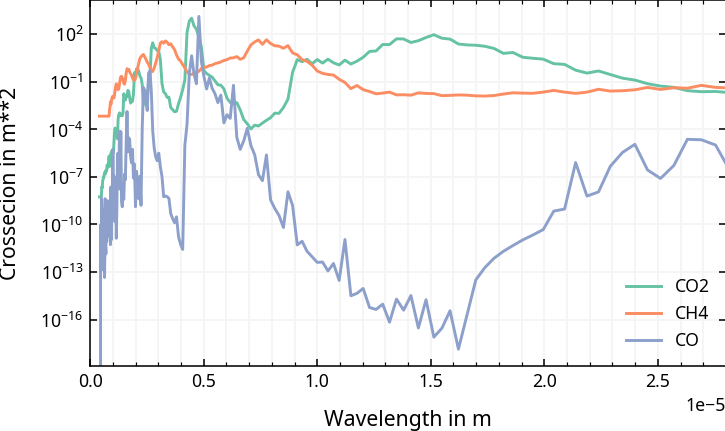

In [10]:
# Calculating the opacities for co2, co and ch4

mu_co2 = 44.009
mu_co = 28.010
mu_ch4 = 16.043

opacity_co2 = opacity(co2_cross_section , mu_co2)
opacity_co = opacity(co_cross_section, mu_co)
opacity_ch4 = opacity(ch4_cross_section, mu_ch4)

fig, ax = plt.subplots()

ax.plot(co2_wave, opacity_co2, label = "CO2")
ax.plot(ch4_wave, opacity_ch4, label = "CH4")
ax.plot(co_wave, opacity_co, label = "CO")
ax.set_ylabel("Crossecion in m**2")
ax.set_xlabel("Wavelength in m")
ax.set_yscale("log")
ax.set_xlim(0,2.8e-5)


ax.legend()
plt.savefig("Crosssections.svg")
plt.show()

In [100]:
colors

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

In [47]:
def Albedo(omega):
    return 3 * omega / 16

co2_albedo = Albedo(co2_omega)
co_albedo = Albedo(co_omega)
ch4_albedo = Albedo(ch4_omega)

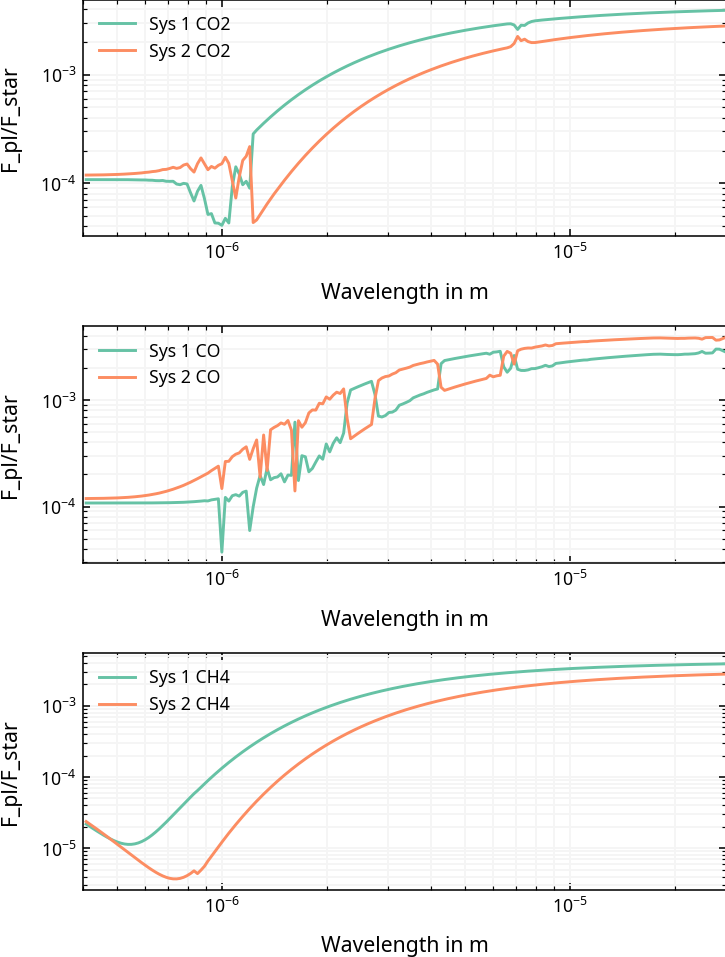

In [91]:
# Simulate the planets for each atmosphere 

# CO2 

system1_co2 = (co2_wave, 1, 1, 0.01992, 5000, 1500, 2000, co2_cross_section, 
               mu_co2, 1e5, co2_albedo, 9.8)
system2_co2 = (co2_wave, 1, 1, 0.019, 5000, 2000, 1500, co2_cross_section, 
               mu_co2, 1e5, co2_albedo, 9.8)

# CO

system1_co = (co_wave, 1, 1, 0.01992, 5000, 1500, 2000, co_cross_section, 
               mu_co, 1e5, co_albedo, 9.8)
system2_co = (co_wave, 1, 1, 0.019, 5000, 2000, 1500, co_cross_section, 
               mu_co, 1e5, co_albedo, 9.8)

# CH4

system1_ch4 = (ch4_wave, 1, 1, 0.01992, 5000, 1500, 2000, ch4_cross_section, 
               mu_ch4, 1e5, ch4_albedo, 9.8)
system2_ch4 = (ch4_wave, 1, 1, 0.019, 5000, 2000, 1500, ch4_cross_section, 
               mu_ch4, 1e5, ch4_albedo, 9.8)


fig, ax = plt.subplots(ncols=1, nrows=3, 
                       figsize=set_size(height_factor=1.3))

ax[0].plot(co2_wave, contrast(*system1_co2), label = "Sys 1 CO2")
ax[1].plot(co_wave, contrast(*system1_co), label = "Sys 1 CO")
ax[2].plot(ch4_wave, contrast(*system1_ch4), label = "Sys 1 CH4")
ax[0].plot(co2_wave, contrast(*system2_co2), label = "Sys 2 CO2")
ax[1].plot(co_wave, contrast(*system2_co), label = "Sys 2 CO")
ax[2].plot(ch4_wave, contrast(*system2_ch4), label = "Sys 2 CH4")

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[2].set_xscale("log")

ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[2].set_yscale("log")



ax[0].set_xlim(0.4e-6, 28.1e-6)
ax[1].set_xlim(0.4e-6, 28.1e-6)
ax[2].set_xlim(0.4e-6, 28.1e-6)


ax[0].set_ylabel("F_pl/F_star")
ax[2].set_ylabel("F_pl/F_star")
ax[1].set_ylabel("F_pl/F_star")

ax[0].set_xlabel("Wavelength in m")
ax[1].set_xlabel("Wavelength in m")
ax[2].set_xlabel("Wavelength in m")



plt.tight_layout()
plt.savefig("Atmospheres.svg")
plt.show()

For example the wide field camera 3 in the hubble space telescope detects either uv-vis or near infrared wavelengths from 200-1700 nm. If we have a look at the plots, the scenarios reach their maximum at around 1000 nm. The wfc3 covers the range in which the contrast is becomming constant. We see the contrast for sys 1 is most of the times higher than for sys 2 so the temperature gradient might be causing detection problems as well as the distance of the planet to the star since this is the other parameter that is different for those two systems.

JWST actually has instruments that have a even larger wavelength range so with this tesescope we should be able to detect these sstems. 